In [1]:
import numpy as np
import os
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
path = os.getcwd()
print(path)

C:\Users\pam\Desktop\Hank\springboard\Springboard\second_capstone


In [3]:
df = pd.read_csv(path+'\\data\\listings.csv')
#df = pd.read_csv('C:\\Users\\pam\\Desktop\\Hank\\springboard\\Springboard\\second_capstone\\data\\listings.csv')

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2265,Zen-East in the Heart of Austin (monthly rental),2466,Paddy,NaN,78702,30.27750,-97.71398,Entire home/apt,225,30,24,2019-03-16,0.18,3,0
1,5245,"Eco friendly, Colorful, Clean, Cozy monthly share",2466,Paddy,NaN,78702,30.27577,-97.71379,Private room,100,30,9,2018-03-14,0.07,3,0
2,5456,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,NaN,78702,30.26112,-97.73448,Entire home/apt,95,2,532,2020-03-19,3.90,1,359
3,5769,NW Austin Room,8186,Elizabeth,NaN,78729,30.45697,-97.78422,Private room,40,1,257,2019-11-03,2.09,1,18
4,6413,Gem of a Studio near Downtown,13879,Todd,NaN,78704,30.24829,-97.73726,Entire home/apt,99,30,112,2020-03-08,0.88,1,13


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11081 entries, 0 to 11080
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              11081 non-null  int64  
 1   name                            11081 non-null  object 
 2   host_id                         11081 non-null  int64  
 3   host_name                       11079 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   11081 non-null  int64  
 6   latitude                        11081 non-null  float64
 7   longitude                       11081 non-null  float64
 8   room_type                       11081 non-null  object 
 9   price                           11081 non-null  int64  
 10  minimum_nights                  11081 non-null  int64  
 11  number_of_reviews               11081 non-null  int64  
 12  last_review                     

It appears the neighbourhood_group column is just NaN's. This column will be dropped.

In [6]:
del df['neighbourhood_group']

In [7]:
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2265,Zen-East in the Heart of Austin (monthly rental),2466,Paddy,78702,30.27750,-97.71398,Entire home/apt,225,30,24,2019-03-16,0.18,3,0
1,5245,"Eco friendly, Colorful, Clean, Cozy monthly share",2466,Paddy,78702,30.27577,-97.71379,Private room,100,30,9,2018-03-14,0.07,3,0
2,5456,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,78702,30.26112,-97.73448,Entire home/apt,95,2,532,2020-03-19,3.90,1,359
3,5769,NW Austin Room,8186,Elizabeth,78729,30.45697,-97.78422,Private room,40,1,257,2019-11-03,2.09,1,18
4,6413,Gem of a Studio near Downtown,13879,Todd,78704,30.24829,-97.73726,Entire home/apt,99,30,112,2020-03-08,0.88,1,13


The "name" column could also be dropped since it most likely will not factor into determining price.

In [8]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [9]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood                       int64
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [10]:
df.count()

id                                11081
name                              11081
host_id                           11081
host_name                         11079
neighbourhood                     11081
latitude                          11081
longitude                         11081
room_type                         11081
price                             11081
minimum_nights                    11081
number_of_reviews                 11081
last_review                        8529
reviews_per_month                  8529
calculated_host_listings_count    11081
availability_365                  11081
dtype: int64

In [32]:
# We have some missing values, but the variables of interest (price, neighbourhood, latitude, longitude, host_id, and num. of reviews) all
# have the same count.

In [11]:
df.describe()

,id,host_id,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.108100e+04,1.108100e+04,11081.000000,11081.000000,11081.000000,11081.000000,11081.000000,11081.000000,8529.000000,11081.000000,11081.000000
mean,2.381122e+07,7.645686e+07,78722.340673,30.279036,-97.751716,492.118672,5.722949,30.969046,1.443823,12.661763,126.208465
std,1.338469e+07,8.574531e+07,20.741396,0.058093,0.057206,1516.036233,17.800067,63.384181,1.816038,39.594504,137.418101
min,2.265000e+03,2.300000e+01,78701.000000,30.118850,-98.053550,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.203879e+07,9.217074e+06,78703.000000,30.244480,-97.767760,80.000000,1.000000,1.000000,0.220000,1.000000,0.000000
50%,2.358158e+07,4.004322e+07,78721.000000,30.267280,-97.745150,147.000000,2.000000,6.000000,0.780000,1.000000,82.000000
75%,3.663659e+07,1.174462e+08,78744.000000,30.299950,-97.721290,300.000000,3.000000,31.000000,2.060000,3.000000,256.000000
max,4.345692e+07,3.462766e+08,78759.000000,30.512280,-97.560620,15728.000000,500.000000,951.000000,34.360000,247.000000,365.000000


In [34]:
# May need to convert some of the data to different types.

In [12]:
df = df[['id', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',]]

In [13]:
df.head()

,id,neighbourhood,latitude,longitude,room_type,price,minimum_nights
0,2265,78702,30.27750,-97.71398,Entire home/apt,225,30
1,5245,78702,30.27577,-97.71379,Private room,100,30
2,5456,78702,30.26112,-97.73448,Entire home/apt,95,2
3,5769,78729,30.45697,-97.78422,Private room,40,1
4,6413,78704,30.24829,-97.73726,Entire home/apt,99,30


In [14]:
df['room_type'] = df['room_type'].astype('category')

In [15]:
df.dtypes

id                   int64
neighbourhood        int64
latitude           float64
longitude          float64
room_type         category
price                int64
minimum_nights       int64
dtype: object

In [16]:
df['room_type'].unique()

[Entire home/apt, Private room, Hotel room, Shared room]
Categories (4, object): [Entire home/apt, Private room, Hotel room, Shared room]

---

## Exploratory Data Analysis

Text(0, 0.5, 'Num. of Listings')

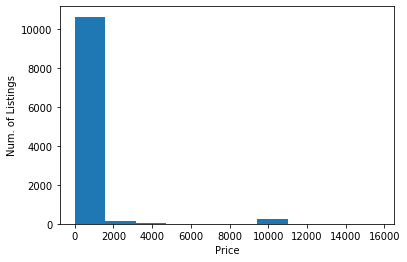

In [17]:
plt.hist(df['price'], bins=10)
plt.xlabel('Price')
plt.ylabel('Num. of Listings')

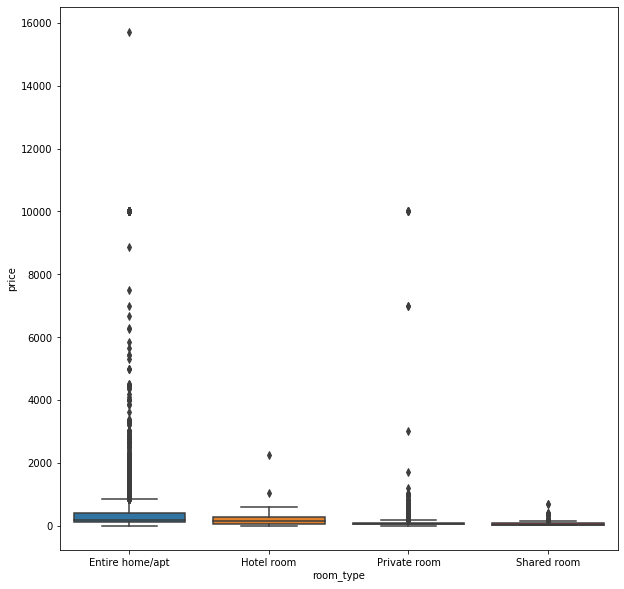

In [18]:
# boxplot
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x='room_type', y='price', data=df, ax=ax)

In [21]:
# May need to scale data due to outliers.


## Mapping Data

In [19]:
import folium
from folium import plugins
import json

In [20]:
map_df = df[['latitude', 'longitude', 'room_type', 'price']]

In [21]:
map_df.head()

,latitude,longitude,room_type,price
0,30.27750,-97.71398,Entire home/apt,225
1,30.27577,-97.71379,Private room,100
2,30.26112,-97.73448,Entire home/apt,95
3,30.45697,-97.78422,Private room,40
4,30.24829,-97.73726,Entire home/apt,99


In [22]:
map_df.room_type.unique()

[Entire home/apt, Private room, Hotel room, Shared room]
Categories (4, object): [Entire home/apt, Private room, Hotel room, Shared room]

In [23]:
rooms = list(map_df.room_type.unique())
colors = ['blue', 'red', 'yellow', 'green']

map_colors = dict(zip(rooms, colors))
print(map_colors)
print(map_colors.values())

{'Entire home/apt': 'blue', 'Private room': 'red', 'Hotel room': 'yellow', 'Shared room': 'green'}
dict_values(['blue', 'red', 'yellow', 'green'])


In [50]:
with open(path+'\\data\\atx.geojson') as f:
    atxArea = json.load(f)

In [68]:
lat, lon = np.mean(map_df['latitude']), np.mean(map_df['longitude'])

austinMap = folium.Map(location=[lat,
                                 lon],
                      tiles='Stamen Toner',
                      zoom_start = 9)

In [69]:
folium.GeoJson(atxArea).add_to(austinMap)

In [70]:
for i, row in map_df.iterrows():
    folium.CircleMarker((row.latitude, row.longitude),
                       radius=3,
                       weight=2,
                       color = 'red',
                       fill_color = 'red',
                       fill_opacity = .5).add_to(austinMap)

In [71]:
austinMap.save('atxPointMap.html')

## Data Training and Pre-processing

After converting room type to categorical variables, going to get dummies for room type column.

In [24]:
df = pd.get_dummies(df, columns=['room_type'])

In [25]:
df.head()

,id,neighbourhood,latitude,longitude,price,minimum_nights,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,2265,78702,30.27750,-97.71398,225,30,1,0,0,0
1,5245,78702,30.27577,-97.71379,100,30,0,0,1,0
2,5456,78702,30.26112,-97.73448,95,2,1,0,0,0
3,5769,78729,30.45697,-97.78422,40,1,0,0,1,0
4,6413,78704,30.24829,-97.73726,99,30,1,0,0,0


The target variable is price so df['price'] is the y variable.

In [26]:
df.columns

Index(['id', 'neighbourhood', 'latitude', 'longitude', 'price',
       'minimum_nights', 'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room'],
      dtype='object')

In [31]:
X = df[['id', 'neighbourhood', 'latitude', 'longitude',
       'minimum_nights', 'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room']]
y = df[['price']]

In [28]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [33]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8310, 9) (8310, 1)
(2771, 9) (2771, 1)


In [34]:
from sklearn.linear_model import LinearRegression

In [36]:
linReg = LinearRegression()

In [37]:
linReg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
print(linReg.score(X_train, y_train))

0.04671532030102521


In [39]:
y_pred = linReg.predict(X_test)

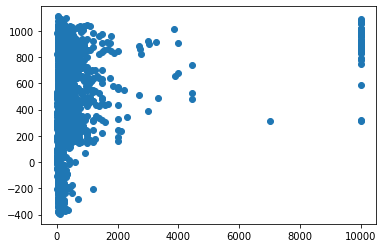

In [40]:
plt.scatter(y_test, y_pred)